# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [7]:
# load json as string
json_ex = json.load((open('data/world_bank_projects_less.json')))

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df.head(2)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Inspect the JSON data

In [9]:
# load json as string
json_str = json.load((open('data/world_bank_projects.json')))

In [11]:
# load as Pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [12]:
# We see that there are no null country names, 500 of 500 rows are non-null
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

# 1. Find the 10 countries with most projects

In [13]:
# We group by country name and the result is sorted by count (DESC)
country_cnts = json_df['countryshortname'].value_counts()
q1_solution = country_cnts.head(10)
print(q1_solution)

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Morocco               12
Bangladesh            12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64


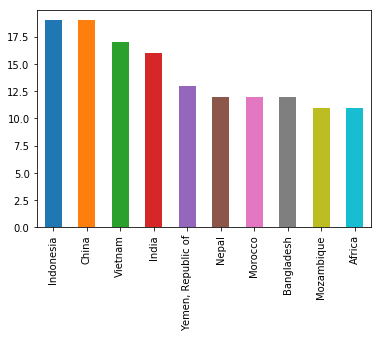

In [15]:
q1_solution.plot(kind='bar')

# 2:Find the top 10 major project themes 

In [16]:
theme_cnts = json_df['mjtheme_namecode'].value_counts()
print(theme_cnts.head(5))
# looks like each entry is a list of dictionaries

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]             12
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]                                                                                     11
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]                                                                      8
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]                        6
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector governance'}]     6
Name: mjtheme_namecode, dtype: int64


# First Attempt

In [17]:
## Cycle through the JSON elements in  mjtheme_namecode
themes = json_df['mjtheme_namecode']
theme_cnts = {}

for obj in themes:
    # if a list of dicts, cycle through each dict and count based on code
    if type(obj) is list:
        for dct in obj:
            for k, v in dct.items():
                if k=='code':
                    if v in theme_cnts.keys():
                        theme_cnts[v] = theme_cnts[v] + 1                      
                    else:
                        theme_cnts[v] = 1
    # if single dict, iterate theme_cnts based on code 
    elif type(obj) is dict:
        for k, v in obj.items():
            if k=='code':
                if v in theme_cnts.keys():
                    theme_cnts[v] = theme_cnts[v] + 1
                else:
                    theme_cnts[v] = 1
                    


In [18]:
print(theme_cnts.items())

dict_items([('8', 210), ('11', 250), ('1', 38), ('6', 168), ('5', 77), ('2', 199), ('7', 130), ('4', 146), ('10', 216), ('9', 50), ('3', 15)])


# 2nd Attempt

In [19]:
# figured out that normalize function above in example splits up the instances contained in each row into a separate row
theme_df = json_normalize(json_str,"mjtheme_namecode")
print(theme_df.head())

  code                                   name
0    8                      Human development
1   11                                       
2    1                    Economic management
3    6  Social protection and risk management
4    5                  Trade and integration


In [20]:
# Create a dictionary with theme name and corresponding code
theme_names = {}

for ind, row in theme_df.iterrows():
    if row["name"] != '':
        if row["name"] not in theme_names.keys():
            theme_names[row["name"]] = row["code"]

print(theme_names)

{'Human development': '8', 'Economic management': '1', 'Social protection and risk management': '6', 'Trade and integration': '5', 'Public sector governance': '2', 'Environment and natural resources management': '11', 'Social dev/gender/inclusion': '7', 'Financial and private sector development': '4', 'Rural development': '10', 'Urban development': '9', 'Rule of law': '3'}


In [21]:
# Create a dictionary with numeric theme as key, theme name as value
themes_dict = {}
for k, v in theme_names.items():
    themes_dict[v] = k
print(themes_dict)

{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [22]:
# Count instances of each code
theme_cnts2 = theme_df['code'].value_counts().reset_index()
theme_cnts2.columns = ['Code', 'Count']
# Use above dictionary to assign names to each code
theme_cnts2['Name'] = theme_cnts2['Code'].map(themes_dict)


In [23]:
# Store top 10 occurrences 
solution2 = theme_cnts2.head(10)
print(solution2)

  Code  Count                                          Name
0   11    250  Environment and natural resources management
1   10    216                             Rural development
2    8    210                             Human development
3    2    199                      Public sector governance
4    6    168         Social protection and risk management
5    4    146      Financial and private sector development
6    7    130                   Social dev/gender/inclusion
7    5     77                         Trade and integration
8    9     50                             Urban development
9    1     38                           Economic management


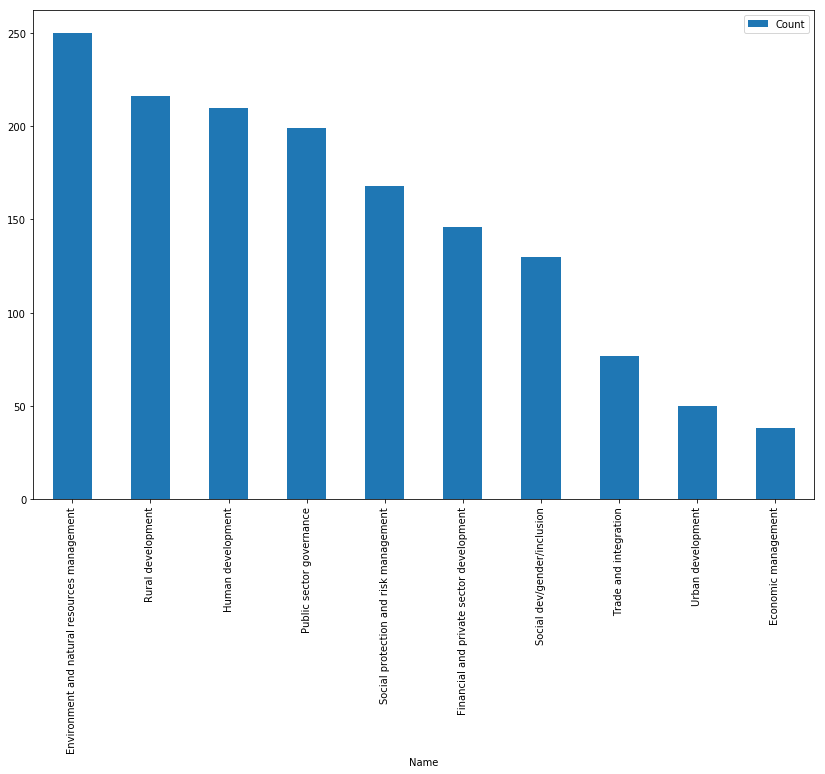

In [50]:
solution2.plot(kind='bar', x='Name', figsize=(14,9))

# 3. Create a dataframe with the missing names filled in.

In [24]:
# Iterate through theme_df and assign name based on theme_dict
for ind, row in theme_df.iterrows():
    row["name"] = themes_dict[row["code"]]
    
print(theme_df)

     code                                          name
0       8                             Human development
1      11  Environment and natural resources management
2       1                           Economic management
3       6         Social protection and risk management
4       5                         Trade and integration
5       2                      Public sector governance
6      11  Environment and natural resources management
7       6         Social protection and risk management
8       7                   Social dev/gender/inclusion
9       7                   Social dev/gender/inclusion
10      5                         Trade and integration
11      4      Financial and private sector development
12      6         Social protection and risk management
13      6         Social protection and risk management
14      2                      Public sector governance
15      4      Financial and private sector development
16     11  Environment and natural resources man